In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [113]:
data = pd.read_csv('sgemm_product.csv')

In [114]:
data['Mean_Runtime'] = (data['Run1 (ms)'] + data['Run2 (ms)'] + data['Run3 (ms)'] + data['Run4 (ms)'])/4

In [115]:
data = data.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)'], axis = 1)

In [116]:
x = data.iloc[:,0:-1].values
y = data['Mean_Runtime'].values

In [117]:
print(x.shape)

print(type(x))

print(y.shape)

print(type(y))

(241600, 14)
<class 'numpy.ndarray'>
(241600,)
<class 'numpy.ndarray'>


In [118]:
median = data['Mean_Runtime'].median()
data.loc[data['Mean_Runtime'] >= median, 'Mean_Runtime_1'] = 1
data.loc[data['Mean_Runtime'] < median, 'Mean_Runtime_1'] = 0

In [119]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Mean_Runtime,Mean_Runtime_1
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,1.0


In [120]:
data = data.drop(['Mean_Runtime'], axis = 1)

In [121]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Mean_Runtime_1
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [122]:
x = data.iloc[:,0:-1].values
y = data['Mean_Runtime_1'].values

In [123]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [125]:
theta = np.zeros([15,1])

m = len(x_train)

ones = np.ones((m,1))

x_train = np.hstack((ones, x_train))


In [126]:
print(x_train.shape)

(169120, 15)


In [127]:
x_test.shape

(72480, 14)

In [128]:
m1 = len(x_test)

ones = np.ones((m1,1))

x_test = np.hstack((ones, x_test))

In [129]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [130]:
print(x_train.shape)
print(x_test.shape)


print(y_train.shape)
print(y_test.shape)

(169120, 15)
(72480, 15)
(169120, 1)
(72480, 1)


In [131]:
def sigmoid(X, theta):
    
    z = np.dot(X, theta)
    
    return 1/(1 + np.exp(-z))

In [132]:
sigmoid(x_train, theta)

array([[0.5],
       [0.5],
       [0.5],
       ...,
       [0.5],
       [0.5],
       [0.5]])

In [133]:
def costfunction(X, Y, theta):
    
    m = len(Y)
    
    predictions = sigmoid(X,theta)
    
    error = (-Y * np.log(predictions)) - ((1-Y)*np.log(1-predictions))
    
    cost = 1/m * sum(error)
    
    return cost
  
    
    

In [134]:
costfunction(x_train, y_train, theta)

array([0.69314718])

In [135]:
def gradient_descent(X, Y, B, alpha, iterations):
    
    cost_history_train = []
    
    cost_history_test = []
    
    m = len(Y)
    
    for iteration in range(iterations):
        
        h = sigmoid(X,B)
        
        loss = h - Y
        
        gradient = X.T.dot(loss) / m
        
        B = B - alpha * gradient
        
        
        cost_train = costfunction(X, Y, B)
        
        cost_history_train.append(cost_train)
        
        
        cost_test = costfunction(x_test, y_test, B)
        
        cost_history_test.append(cost_test)
        
        
        #if len(cost_history_train) > 1:
        
            #if cost_history_train[iteration-1] - cost_history_train[iteration] <  threshold:
                
                #break
        
    return B, cost_history_train, cost_history_test


In [136]:
B, cost_history_train, cost_history_test = gradient_descent(x_train, y_train, theta, 0.5, 2000)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

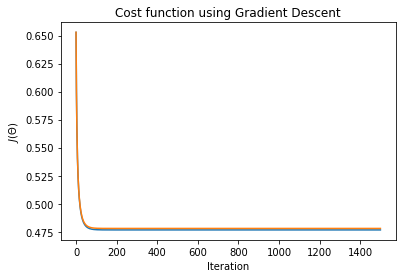

In [26]:
plt.plot(cost_history_train, label = 'training_cost')

plt.plot(cost_history_test, label = 'testning_cost')

plt.xlabel("Iteration")

plt.ylabel("$J(\Theta)$")

plt.title("Cost function using Gradient Descent")

In [27]:
B

array([[ 4.35513497e-04],
       [ 1.32454994e+00],
       [ 8.58360244e-01],
       [ 1.50211886e-01],
       [-9.03298128e-01],
       [-7.72374325e-01],
       [-4.67628224e-02],
       [-7.36807872e-02],
       [-1.75138651e-02],
       [-7.52048154e-02],
       [-1.46542848e-01],
       [-3.21763063e-01],
       [-3.48914219e-02],
       [-3.97702531e-01],
       [-8.00854199e-02]])

In [28]:
optimized_predictions = sigmoid(x_test, B)

In [29]:
optimized_predictions

array([[0.47394902],
       [0.83023405],
       [0.05119322],
       ...,
       [0.14031998],
       [0.22191484],
       [0.53159622]])

In [45]:
def probabilities(x, B):
    
    optimized_predictions = sigmoid(x, B)

    probabilities = []

    for i in optimized_predictions:
    
        if i>0.5:
        
            probabilities.append(1)
        
        else:
            probabilities.append(0)
    
    return probabilities


In [32]:
optimized_cost = costfunction(x_test,y_test, B)

In [33]:
print(optimized_cost)

[0.47795961]


In [34]:
B1,  cost_history_train1, cost_history_test1 = gradient_descent(x_train, y_train, theta, 0.0001, 2000)

B2,  cost_history_train2, cost_history_test2 = gradient_descent(x_train, y_train, theta, 0.001, 2000 )

B3,  cost_history_train3, cost_history_test3 = gradient_descent(x_train, y_train, theta, 0.01, 2000)

B4,  cost_history_train4, cost_history_test4 = gradient_descent(x_train, y_train, theta, 0.1, 2000)


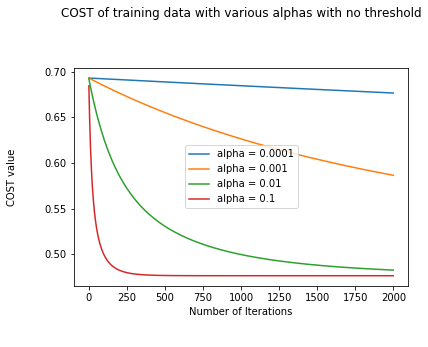

In [137]:
plt.plot(cost_history_train1,  label='alpha = 0.0001')

plt.plot(cost_history_train2,  label ='alpha = 0.001')

plt.plot(cost_history_train3,  label ='alpha = 0.01')

plt.plot(cost_history_train4,  label ='alpha = 0.1')



plt.legend()

plt.title('COST of training data with various alphas with no threshold\n\n\n')

plt.xlabel('Number of Iterations\n\n')

plt.ylabel('COST value\n\n')

plt.show()

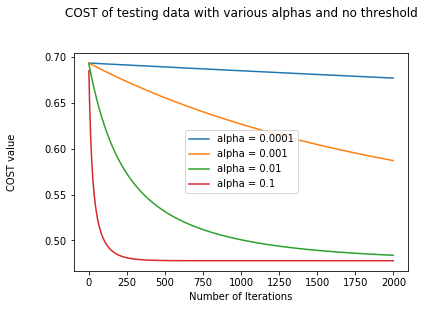

In [150]:
plt.plot(cost_history_test1,  label='alpha = 0.0001')

plt.plot(cost_history_test2,  label ='alpha = 0.001')

plt.plot(cost_history_test3,  label ='alpha = 0.01')

plt.plot(cost_history_test4,  label ='alpha = 0.1')

plt.legend()

plt.title('COST of testing data with various alphas and no threshold\n\n')

plt.xlabel('Number of Iterations\n\n')

plt.ylabel('COST value\n\n')

plt.show()

In [139]:
y_pred_train1 =  probabilities(x_train, B1)
y_pred_train2 = probabilities(x_train, B2)
y_pred_train3 = probabilities(x_train, B3)
y_pred_train4 = probabilities(x_train, B4)

y_pred_test1 = probabilities(x_test, B1)
y_pred_test2 = probabilities(x_test, B2)
y_pred_test3 = probabilities(x_test, B3)
y_pred_test4 = probabilities(x_test, B4)


In [140]:
from sklearn.metrics import accuracy_score

In [141]:
accuracy_train1 = accuracy_score(y_train, y_pred_train1)

accuracy_train2 = accuracy_score(y_train, y_pred_train2)

accuracy_train3 = accuracy_score(y_train, y_pred_train3)

accuracy_train4 = accuracy_score(y_train, y_pred_train4)

accuracy_test1 = accuracy_score(y_test, y_pred_test1)

accuracy_test2 = accuracy_score(y_test, y_pred_test2)

accuracy_test3 = accuracy_score(y_test, y_pred_test3)

accuracy_test4 = accuracy_score(y_test, y_pred_test4)

print(accuracy_train1)

print(accuracy_train2)

print(accuracy_train3)

print(accuracy_train4)

print(accuracy_test1)

print(accuracy_test2)

print(accuracy_test3)

print(accuracy_test4)

0.7769512771996215
0.7843483916745506
0.8078169347209082
0.8108561967833491
0.775096578366446
0.7826848785871965
0.8076986754966887
0.8104994481236203


In [142]:
training_accuracies = [accuracy_train1, accuracy_train2, accuracy_train3,  accuracy_train4]

testing_accuracies = [accuracy_test1, accuracy_test2, accuracy_test3,  accuracy_test4]

alpha_values = [0.0001,0.001,0.01,0.1]

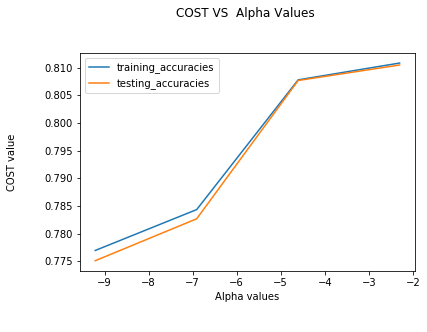

In [143]:
plt.plot(np.log(alpha_values), training_accuracies, label = 'training_accuracies')
plt.plot(np.log(alpha_values), testing_accuracies, label = 'testing_accuracies')
plt.legend()


plt.title('COST VS  Alpha Values \n\n')

plt.xlabel('Alpha values\n\n')

plt.ylabel('COST value\n\n')

plt.show()

In [145]:
def gradient_descent_t(X, Y, B, alpha, iterations, threshold):
    
    cost_history_train = []
    
    cost_history_test = []
    
    m = len(Y)
    
    for iteration in range(iterations):
        
        h = sigmoid(X,B)
        
        loss = h - Y
        
        gradient = X.T.dot(loss) / m
        
        B = B - alpha * gradient
        
        
        cost_train = costfunction(X, Y, B)
        
        cost_history_train.append(cost_train)
        
        
        cost_test = costfunction(x_test, y_test, B)
        
        cost_history_test.append(cost_test)
        
        
        if len(cost_history_train) > 1:
        
            if cost_history_train[iteration-1] - cost_history_train[iteration] <  threshold:
                
                break
        
    return B, cost_history_train, cost_history_test


In [146]:
B5, cost_history_train5, cost_history_test5 = gradient_descent_t(x_train, y_train, theta, 0.01, 2000, 0.0001)

B6, cost_history_train6, cost_history_test6 = gradient_descent_t(x_train, y_train, theta, 0.01, 2000, 0.05 )

B7, cost_history_train7, cost_history_test7 = gradient_descent_t(x_train, y_train, theta, 0.01, 2000, 0.1)

B8, cost_history_train8, cost_history_test8 = gradient_descent_t(x_train, y_train, theta, 0.01,2000, 0.0000003)


In [147]:
y_pred_train5 =  probabilities(x_train, B5)
y_pred_train6 = probabilities(x_train, B6)
y_pred_train7 = probabilities(x_train, B7)
y_pred_train8 = probabilities(x_train, B8)

y_pred_test5 = probabilities(x_test, B5)
y_pred_test6 = probabilities(x_test, B6)
y_pred_test7 = probabilities(x_test, B7)
y_pred_test8 = probabilities(x_test, B8)


In [148]:
accuracy_train5 = accuracy_score(y_train, y_pred_train5)

accuracy_train6 = accuracy_score(y_train, y_pred_train6)

accuracy_train7 = accuracy_score(y_train, y_pred_train7)

accuracy_train8 = accuracy_score(y_train, y_pred_train8)

accuracy_test5 = accuracy_score(y_test, y_pred_test5)

accuracy_test6 = accuracy_score(y_test, y_pred_test6)

accuracy_test7 = accuracy_score(y_test, y_pred_test7)

accuracy_test8 = accuracy_score(y_test, y_pred_test8)

print(accuracy_train5)

print(accuracy_train6)

print(accuracy_train7)

print(accuracy_train8)

print(accuracy_test5)

print(accuracy_test6)

print(accuracy_test7)

print(accuracy_test8)

0.7942999053926206
0.7760879848628193
0.7760879848628193
0.8078169347209082
0.7934878587196468
0.774296357615894
0.774296357615894
0.8076986754966887


In [149]:
training_accuracies1 = [accuracy_train5, accuracy_train6, accuracy_train7,  accuracy_train8]

testing_accuracies1 = [accuracy_test5, accuracy_test6, accuracy_test7,  accuracy_test8]

threshold_values = [0.0001,0.05,0.1,0.0000003]

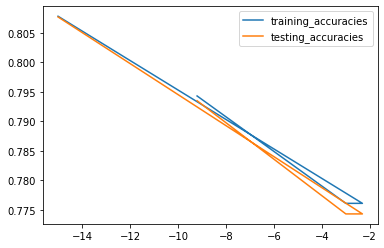

In [82]:
plt.plot(np.log(threshold_values), training_accuracies1, label = 'training_accuracies')
plt.plot(np.log(threshold_values), testing_accuracies1, label = 'testing_accuracies')
plt.legend()


In [84]:
B_f, cost_history_train_f, cost_history_test_f = gradient_descent_t(x_train, y_train, theta, 0.01, 2000, 10**-12)

In [152]:
p_f = probabilities(x_test, B_f)

In [156]:
accuracy_score(y_test, p_f)

0.8076986754966887

In [158]:
p_f_i = probabilities(x_test, theta)

In [159]:
accuracy_score(y_test, p_f_i)

0.4984271523178808